# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [58]:
#  1. Get the total rides for each city type
city_rides=pyber_data_df.groupby("type").count()["ride_id"]
city_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
city_drivers=city_data_df.groupby(["type"]).sum()["driver_count"]
city_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [59]:
#  3. Get the total amount of fares for each city type
city_fares=pyber_data_df.groupby("type").sum()["fare"]
city_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [60]:
#  4. Get the average fare per ride for each city type. 
city_fare_avg=city_fares/city_rides
city_fare_avg

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [61]:
# 5. Get the average fare per driver for each city type. 
city_driver_fare_avg=city_fares/city_drivers
city_driver_fare_avg

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df=pd.DataFrame({"Total Rides":city_rides,
                 "Total Drivers":city_drivers,
                  "Total Fares": city_fares,
                  "Avreage Fare per Ride":city_fare_avg,
                  "Average Fare per Driver":city_driver_fare_avg})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Avreage Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [10]:
#  8. Format the columns.
pyber_summary_df["Total Rides"]=pyber_summary_df["Total Rides"].map("{:,.0f}".format)
pyber_summary_df["Total Drivers"]=pyber_summary_df["Total Drivers"].map("{:,.0f}".format)
pyber_summary_df["Total Fares"]=pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Avreage Fare per Ride"]=pyber_summary_df["Avreage Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"]=pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Avreage Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
pyber_data_df 

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06,34.58,3.908450e+12,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29,13.38,8.550370e+12,6,Rural
2371,Lake Latoyabury,2019-01-30,20.76,9.018730e+12,2,Rural
2372,North Jaime,2019-02-10,11.11,2.781340e+12,1,Rural
2373,West Heather,2019-05-07,44.94,4.256850e+12,4,Rural


In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_date_data=pyber_data_df.groupby(["type","date"]).sum()[["fare"]]
pyber_date_data

fare
type  date              
Rural 2019-01-01   43.69
      2019-01-02   52.12
      2019-01-03   19.90
      2019-01-04   24.88
      2019-01-06   47.33
...                  ...
Urban 2019-05-04  323.57
      2019-05-05  322.10
      2019-05-06  181.20
      2019-05-07  258.01
      2019-05-08  170.82

[334 rows x 1 columns]

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
pyber_date_data = pyber_date_data.reset_index()
pyber_date_data.head

<bound method NDFrame.head of       type        date    fare
0    Rural  2019-01-01   43.69
1    Rural  2019-01-02   52.12
2    Rural  2019-01-03   19.90
3    Rural  2019-01-04   24.88
4    Rural  2019-01-06   47.33
..     ...         ...     ...
329  Urban  2019-05-04  323.57
330  Urban  2019-05-05  322.10
331  Urban  2019-05-06  181.20
332  Urban  2019-05-07  258.01
333  Urban  2019-05-08  170.82

[334 rows x 3 columns]>

In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_date_data=pyber_date_data.pivot(index="date", columns="type", values="fare")
pyber_date_data

type,Rural,Suburban,Urban
date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,NaN,101.36,506.89
...,...,...,...
2019-05-04,NaN,91.71,323.57
2019-05-05,26.53,154.78,322.10
2019-05-06,111.88,34.12,181.20


In [28]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
date_range = pyber_date_data.loc['2019-01-01':'2019-04-28']
date_range

type,Rural,Suburban,Urban
date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,NaN,101.36,506.89
...,...,...,...
2019-04-24,NaN,220.72,312.64
2019-04-25,55.84,155.98,419.81
2019-04-26,NaN,132.45,330.98


In [29]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
date_range.index = pd.to_datetime(date_range.index)

In [30]:
# 7. Check that the datatype for the index is datetime using df.info()
date_range.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118 entries, 2019-01-01 to 2019-04-28
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     73 non-null     float64
 1   Suburban  117 non-null    float64
 2   Urban     118 non-null    float64
dtypes: float64(3)
memory usage: 3.7 KB


In [31]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
date_range_week=date_range.resample("W").sum()
date_range_week

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


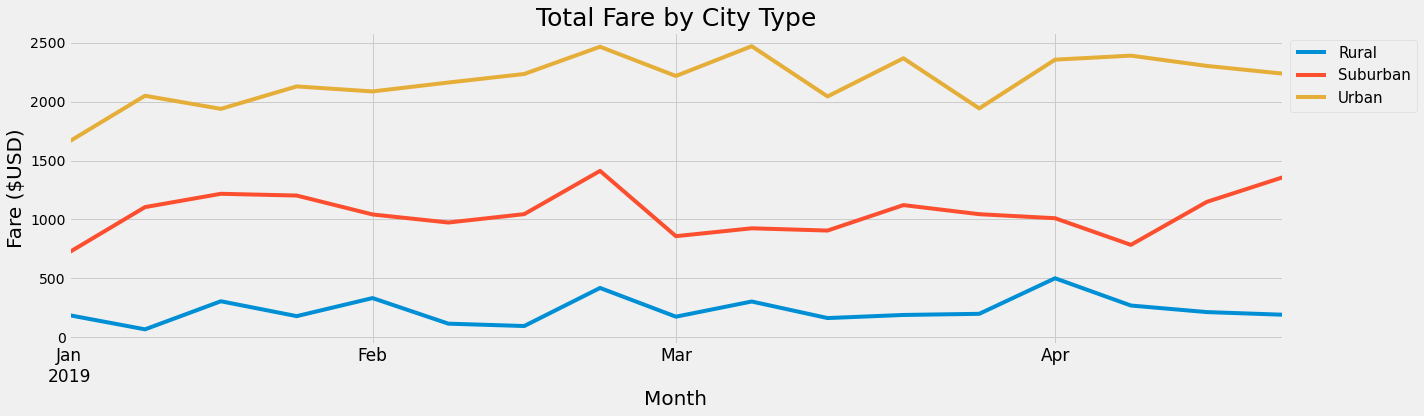

In [57]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
 
#create
date_range_week.plot(figsize=(20,6))

#foramt plot
plt.title("Total Fare by City Type", fontsize=25)
plt.ylabel("Fare ($USD)", fontsize=20)
plt.xlabel("Month", fontsize=20)
plt.grid=True
plt.xticks(fontsize=17)

#create a legend
plt.legend(bbox_to_anchor=(1, 1), fontsize=15)
plt.tight_layout()

plt.savefig("Analysis/PyBer_fare_summary.png")
